In [3]:
prices_a = [8.7, 8.9, 8.72]

In [4]:

import numpy as np

In [5]:
prices_a[1:]

[8.9, 8.72]

In [6]:
prices_a[1:]/prices_a[:-1]
#The reason why it will not work because python does not store it in list format
#so that is why we use pandas and numpy

TypeError: unsupported operand type(s) for /: 'list' and 'list'

In [ ]:
prices = np.array(prices_a)

In [7]:
prices_a[1:]/prices[:-1]-1

NameError: name 'prices' is not defined

In [ ]:
import pandas as pd

In [ ]:
prices = pd.DataFrame({"Blue": [8.7,8.8, 9.3, 7.5], 
                       "Orange":[10, 11, 12.2, 10.8] })

In [ ]:
prices

In [ ]:
prices/prices.shift(1)-1

In [ ]:
prices.shape()

In [ ]:
type(prices)

In [ ]:
prices.pct_change()

In [ ]:
returns = prices.pct_change()

In [ ]:
returns = returns.dropna()

In [ ]:
returns.std()

In [ ]:
mean_return = returns.mean()

In [8]:
mean_return

NameError: name 'mean_return' is not defined

In [ ]:
deviations = returns -returns.mean()

In [ ]:
squared_deviation = deviations**2
variance = squared_deviation.sum()/(squared_deviation.shape[0]-1)
volatility = np.sqrt(variance)
volatility

In [ ]:
import IPython
print(IPython.sys_info())

In [ ]:
prices = pd.read_csv("data/sample_prices.csv")

In [ ]:
import pandas as pd
prices = pd.read_csv("C:/Users/naz/Ozel/EDHEC/Intro/data/sample_prices.csv")

In [ ]:
prices

In [ ]:
returns = prices/prices.shift(1)-1

In [ ]:
returns = returns.dropna()

In [ ]:
returns

In [ ]:
import numpy as np
deviation = (returns-returns.mean())
sqr_deviation = deviation **2
variance = sqr_deviation.sum()/(returns.shape[0]-1)
volatility = np.sqrt(variance)

In [ ]:
volatility

In [ ]:
returns.std()

In [ ]:
import os
os.getcwd()

In [9]:
os.chdir("C:/Users/naz/Ozel/EDHEC/Intro/data/")

NameError: name 'os' is not defined

In [ ]:
returns = pd.read_csv("Portfolios_Formed_on_ME_monthly_EW.csv", header=0, index_col=0,
                     parse_dates=True, na_values = -99.99)

In [ ]:
returns

In [ ]:
columns = ["Lo 10", "Hi 10"]

In [ ]:
returns = returns[columns]/100

In [ ]:
returns.head()

In [ ]:
returns.plot.line()

In [ ]:
%matplotlib inline

In [ ]:
annualized_vol = returns.std()*np.sqrt(12)

In [ ]:
annualized_vol

In [ ]:
n_month = returns.shape[0]
return_per_month =(returns+1).prod()**(1/n_month)-1
return_per_month

In [ ]:
annualized_return = (return_per_month+1)**12-1
annualized_return

In [ ]:
annualized_vol

### Second Method two find Annualized Return

In [10]:
annualized_return = (returns+1).prod()**(12/n_month)-1
annualized_return 

NameError: name 'returns' is not defined

In [ ]:
rf = 0.03
excess_return = annualized_return - rf
sharpe_ratio = excess_return/annualized_vol
sharpe_ratio

### Above the exercise was for lowest 10% Market Cap vs. Upper 10% Biggest Market Cap
### Now let's look at 20% Small Cap versus upper 20% Cap


In [ ]:
columns = ["Lo 20", "Hi 20"]
returns = pd.read_csv("Portfolios_Formed_on_ME_monthly_EW.csv", header= 0, index_col=0,
                    na_values = -99.99)
returns = returns[columns]
returns.columns =["SmallCap", "LargeCap"]

In [ ]:
returns = returns/100
n_month= returns.shape[0]
returns.plot.line()

In [ ]:
annualized_return = (returns+1).prod()**(12/n_month)-1
annualized_vola = returns.std()*np.sqrt(12)

In [ ]:
rf = 0.03
excess_return_20 = annualized_return -rf
sharpe_ratio_20 = excess_return_20/annualized_vola
sharpe_ratio_20


In [ ]:
sharpe_ratio

# Compute Drawdowns

In [22]:
import pandas as pd
me_m = pd.read_csv("Portfolios_Formed_on_ME_monthly_EW.csv",
                   index_col= 0, header=0, parse_dates= True,
                  na_values= -99.99)
col = ["Lo 10", "Hi 10"]
rets = me_m[col]/100
rets.columns = ["SmallCap", "LargeCap"]


### Changing Index into Date Format

In [23]:

rets.index = pd.to_datetime(rets.index, format ="%Y%m")

In [24]:
rets.index = rets.index.to_period('M')
rets.head()

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


In [25]:
rets['1975']

,SmallCap,LargeCap
1975-01,0.3202,0.1286
1975-02,0.0657,0.0613
1975-03,0.0989,0.0414
1975-04,0.0288,0.0531
1975-05,0.0811,0.0610
1975-06,0.0779,0.0524
1975-07,0.0218,-0.0703
1975-08,-0.0525,-0.0177
1975-09,-0.0351,-0.0468
1975-10,-0.0009,0.0620


In [26]:
rets.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1110 entries, 1926-07 to 2018-12
Freq: M
Data columns (total 2 columns):
SmallCap    1110 non-null float64
LargeCap    1110 non-null float64
dtypes: float64(2)
memory usage: 26.0 KB


### Compute Drawdowns

1. Compute a wealth index
2. Compute a previous peaks
3. Compute drawdown - which is the wealth value as a perccentage of  the previous peak

In [27]:
wealth_index = 1000*(1+rets["LargeCap"]).cumprod()

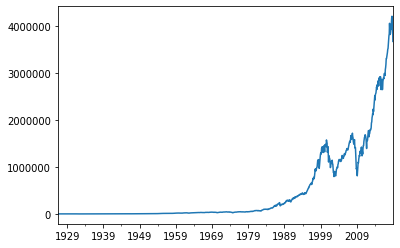

In [29]:
wealth_index.plot.line()

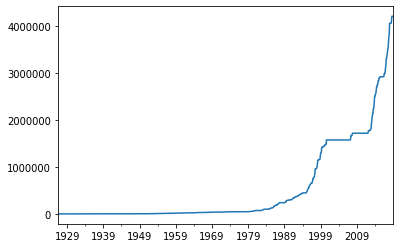

In [30]:
previous_peaks = wealth_index.cummax()
previous_peaks.plot()

In [31]:
drawdown =(wealth_index -previous_peaks)/previous_peaks
drawdown.min()

-0.8400375277943123

### Drawdown for given period

In [32]:
drawdown["1975":].idxmin()

Period('2009-02', 'M')

### A Drowdown Function

In [34]:
drawdown(returns["LargeCap"])

NameError: name 'returns' is not defined

In [ ]:
drawdown(returns["LargeCap"])[["Wealth","Peaks"]].plot()

In [ ]:
drawdown(rets["LargeCap"][:"1950"])[["Wealth","Peaks"]].plot()

In [ ]:
drawdown(rets["SmallCap"])["Drawdown"].idxmin()

In [ ]:
drawdown(rets["SmallCap"]["1975":])["Drawdown"].idxmin()

In [ ]:
drawdown(rets["LargeCap"]["1975":])["Drawdown"].idxmin()

## Building Own Modules

In [35]:
%load_ext autoreload
%autoreload 2 #If you create new module and changes something it will not reflect new changes so you should write it to 
#have these new changes

### Edhec Risk Kit Module

In [36]:
import edhec_risk_kit as erk

In [37]:
erk.drawdown(rets["LargeCap"])["Drawdown"].idxmin()

Period('1932-05', 'M')

In [38]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
rets = erk.get_ffme_return()

In [40]:
erk.skewness(rets)

SmallCap    4.410739
LargeCap    0.233445
dtype: float64

In [41]:
scipy.stats.skew(rets)

NameError: name 'scipy' is not defined

In [42]:
erk.kurtosis(rets)

SmallCap    46.845008
LargeCap    10.694654
dtype: float64

In [43]:
scipy.stats.kurtosis(rets)

NameError: name 'scipy' is not defined

##### So the difference of 3 is coming from that scipy gives us excess kurtosis
##### i.e. is substract 3 from the calculated kurtosis

In [44]:
hfi = erk.get_hfi()

In [45]:
erk.kurtosis(hfi)

Convertible Arbitrage     23.280834
CTA Global                 2.952960
Distressed Securities      7.889983
Emerging Markets           9.250788
Equity Market Neutral     17.218555
Event Driven               8.035828
Fixed Income Arbitrage    29.842199
Global Macro               5.741679
Long/Short Equity          4.523893
Merger Arbitrage           8.738950
Relative Value            12.121208
Short Selling              6.117772
Funds Of Funds             7.070153
dtype: float64

#### Jarque Bera test

In [46]:
from scipy import stats
scipy.stats.jarque_bera(hfi)

NameError: name 'scipy' is not defined

In [ ]:
#### Second number in Jarque BEra Test show us probability that is normal

In [47]:
erk.is_normal(hfi,0.01)

Convertible Arbitrage     False
CTA Global                 True
Distressed Securities     False
Emerging Markets          False
Equity Market Neutral     False
Event Driven              False
Fixed Income Arbitrage    False
Global Macro              False
Long/Short Equity         False
Merger Arbitrage          False
Relative Value            False
Short Selling             False
Funds Of Funds            False
dtype: bool

#### As we see it show us only one return instead of many returns for each HF strategy
#### to do that we use .aggregate function

In [48]:
hfi.aggregate(erk.is_normal)

Convertible Arbitrage     False
CTA Global                 True
Distressed Securities     False
Emerging Markets          False
Equity Market Neutral     False
Event Driven              False
Fixed Income Arbitrage    False
Global Macro              False
Long/Short Equity         False
Merger Arbitrage          False
Relative Value            False
Short Selling             False
Funds Of Funds            False
dtype: bool

In [49]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [92]:
import edhec_risk_kit as erk
erk.is_normal(hfi)


Convertible Arbitrage     False
CTA Global                 True
Distressed Securities     False
Emerging Markets          False
Equity Market Neutral     False
Event Driven              False
Fixed Income Arbitrage    False
Global Macro              False
Long/Short Equity         False
Merger Arbitrage          False
Relative Value            False
Short Selling             False
Funds Of Funds            False
dtype: bool

In [51]:
stat, p = scipy.stats.jarque_bera(hfi)

NameError: name 'scipy' is not defined

In [52]:
np.percentile(hfi,0.05)

-13.336190000000002

In [53]:
erk.var_historic(hfi,5)

Convertible Arbitrage     1.576
CTA Global                3.169
Distressed Securities     1.966
Emerging Markets          4.247
Equity Market Neutral     0.814
Event Driven              2.535
Fixed Income Arbitrage    0.787
Global Macro              1.499
Long/Short Equity         2.598
Merger Arbitrage          1.047
Relative Value            1.174
Short Selling             6.783
Funds Of Funds            2.047
dtype: float64

In [98]:
erk.var_historic(hfi,5)

Convertible Arbitrage     1.576
CTA Global                3.169
Distressed Securities     1.966
Emerging Markets          4.247
Equity Market Neutral     0.814
Event Driven              2.535
Fixed Income Arbitrage    0.787
Global Macro              1.499
Long/Short Equity         2.598
Merger Arbitrage          1.047
Relative Value            1.174
Short Selling             6.783
Funds Of Funds            2.047
dtype: float64

In [91]:
erk.cvar_historic(hfi,level =5)

Convertible Arbitrage     3.655000
CTA Global                4.126429
Distressed Securities     3.642857
Emerging Markets          7.236429
Equity Market Neutral     1.687857
Event Driven              3.833571
Fixed Income Arbitrage    2.825714
Global Macro              2.062857
Long/Short Equity         4.194286
Merger Arbitrage          1.914286
Relative Value            2.465000
Short Selling             9.682143
Funds Of Funds            3.320714
dtype: float64

In [99]:
erk.var_gaussian(hfi, level =5, modified =False)

Convertible Arbitrage     2.169082
CTA Global                3.423512
Distressed Securities     2.103167
Emerging Markets          4.716437
Equity Market Neutral     0.884956
Event Driven              2.114377
Fixed Income Arbitrage    1.457877
Global Macro              1.876650
Long/Short Equity         2.639673
Merger Arbitrage          1.043547
Relative Value            1.306126
Short Selling             8.008618
Funds Of Funds            2.129236
dtype: float64

In [100]:
erk.var_gaussian(hfi, level =5, modified =True)

Convertible Arbitrage     2.516623
CTA Global                3.309407
Distressed Securities     2.510208
Emerging Markets          5.301059
Equity Market Neutral     1.073361
Event Driven              2.551619
Fixed Income Arbitrage    1.788122
Global Macro              1.358129
Long/Short Equity         2.793499
Merger Arbitrage          1.261186
Relative Value            1.615692
Short Selling             6.615668
Funds Of Funds            2.157577
dtype: float64

### From here on I will work on Week 1 Questions

In [150]:
import edhec_risk_kit as erk

In [108]:
r = erk.get_ffme_return(["Lo 20", "Hi 20"])/100

In [123]:
n= r.shape[0]
(1+r)

,SmallCap,LargeCap
1926-07,0.9943,1.0333
1926-08,1.0384,1.0233
1926-09,0.9952,0.9991
1926-10,0.9671,0.9705
1926-11,0.9945,1.0316
...,...,...
2018-08,1.0309,1.0249
2018-09,0.9796,1.0019
2018-10,0.8948,0.9259
2018-11,0.9722,1.0249


In [204]:
#Annualized Return
(1+r).prod()**(12/n)-1

SmallCap    0.151977
LargeCap    0.098490
dtype: float64

In [135]:
#Annualized Vola
import numpy as np
(1+r).std()*np.sqrt(12)

SmallCap    0.336701
LargeCap    0.195116
dtype: float64

In [205]:
#Annualized Return over 1999-2015
n_bt = r["1999":"2015"].shape[0]
df=r["1999":"2015"]
((1+df).prod()**(12/n_bt)-1)*100

SmallCap    11.442634
LargeCap     6.286512
dtype: float64

In [145]:
df.std()*np.sqrt(12)*100

SmallCap    22.889447
LargeCap    17.271332
dtype: float64

In [163]:
erk.drawdown_cal(df["SmallCap"]).min()

Drawdown      -0.624809
Wealth      1034.189842
Peak        1111.400000
dtype: float64

In [164]:
erk.drawdown_cal(df["SmallCap"]).idxmin()

Drawdown    2009-02
Wealth      1999-03
Peak        1999-01
dtype: period[M]

In [165]:
erk.drawdown_cal(df["LargeCap"]).min()

Drawdown      -0.552735
Wealth       721.706638
Peak        1015.300000
dtype: float64

In [166]:
erk.drawdown_cal(df["LargeCap"]).idxmin()

Drawdown    2009-02
Wealth      2002-09
Peak        1999-01
dtype: period[M]

In [193]:
hfi = erk.get_hfi()
df = hfi.copy()
df.index =pd.to_datetime(df.index, format="%d/%m/%Y").to_period("M")
df = df["2009":"2018"]

In [199]:
indx = df<0
df[indx].std()

Convertible Arbitrage     0.678793
CTA Global                1.108857
Distressed Securities     0.962595
Emerging Markets          1.545259
Equity Market Neutral     0.527476
Event Driven              1.027840
Fixed Income Arbitrage    0.339517
Global Macro              0.512274
Long/Short Equity         1.229725
Merger Arbitrage          0.366899
Relative Value            0.581603
Short Selling             2.138309
Funds Of Funds            0.804716
dtype: float64

In [200]:
erk.skewness(df)

Convertible Arbitrage     1.305911
CTA Global                0.052062
Distressed Securities    -0.254944
Emerging Markets          0.033123
Equity Market Neutral    -0.896327
Event Driven             -0.488821
Fixed Income Arbitrage    1.121453
Global Macro              0.348184
Long/Short Equity        -0.463703
Merger Arbitrage         -0.551065
Relative Value            0.159953
Short Selling             0.456518
Funds Of Funds           -0.646908
dtype: float64

In [206]:
hfi = erk.get_hfi()
df = hfi.copy()
df.index =pd.to_datetime(df.index, format="%d/%m/%Y").to_period("M")
df = df["2010":"2018"]

In [209]:
import scipy as sc

In [210]:
sc.stats.kurtosis(df)

array([ 0.69432751, -0.40389484,  0.16978216,  0.69144147,  2.04364047,
        0.57535207,  0.2558356 , -0.11264772,  1.20997054, -0.38141438,
        0.47287432,  1.41851028,  0.55405882])

In [211]:
erk.kurtosis(df)

Convertible Arbitrage     3.694328
CTA Global                2.596105
Distressed Securities     3.169782
Emerging Markets          3.691441
Equity Market Neutral     5.043640
Event Driven              3.575352
Fixed Income Arbitrage    3.255836
Global Macro              2.887352
Long/Short Equity         4.209971
Merger Arbitrage          2.618586
Relative Value            3.472874
Short Selling             4.418510
Funds Of Funds            3.554059
dtype: float64